In [31]:
#csv lecture with Mr.Jeff 30/05/2025
import os
import pandas as pd
import numpy as np
#Load the dataset
df=pd.read_csv('data.csv')

In [32]:
#display the first few rows
df.head(12)

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
5,60,102,127,300.0
6,60,110,136,374.0
7,45,104,134,253.3
8,30,109,133,195.1
9,60,98,124,269.0


In [33]:
# Data Preprocessing or Data Cleaning
# Bad data handling
# 1.Empty values
# 2.Wrong formats   30/05/2025       30052025   30-05-2025
# 3.Wrong data      Age 23           -23     123,    20   to 29  129
# 4.Duplicates       More entries for the same person

In [34]:
#checking for empty values
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [35]:
#data types -wrong types
print(df.dtypes)

Duration      int64
Pulse         int64
Maxpulse      int64
Calories    float64
dtype: object


In [36]:
# Check for non numeric values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if not pd.to_numeric(df[col], errors='coerce').notnull().all():
        print(f"Non-numeric values found in column: {col}")

Non-numeric values found in column: Calories


In [37]:
# Wrong data
# Check for negative values in numeric columns
for col in ['Duration', 'Pulse', 'Maxpulse', 'Calories']:
    if (df[col] < 0).any():
        print(f"Negative values found in column: {col}")

Negative values found in column: Maxpulse


In [38]:
# recommendations principles for data cleaning
# 1. Handle fill empty values/cells
# 2. Convert wrong formats
# 3. Correct wrong data
# 4. Remove duplicates in rows not in columns

In [39]:
# Duplicates
duplicates = df.duplicated()
if duplicates.any():
    print("Duplicates found:")
    print(df[duplicates])
else:
    print("No duplicates found.")

Duplicates found:
     Duration  Pulse  Maxpulse  Calories
36         60    102       127     300.0
37         60    100       120     300.0
38         60    100       120     300.0
40         45     90       112     180.1
71         60    109       153     387.6
113        45    100       120     225.3
155        60    111       151     368.5


In [40]:
# Exploratory Data Analysis
# Check the shape of the dataset
print("Shape of the dataset:", df.shape)

Shape of the dataset: (169, 4)


In [47]:
for col in  ['Duration','Pulse','Maxpulse','Calories']:
    df[col].fillna(df[col].median(),inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_22876\326054097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(),inplace=True)


In [48]:
#summary statistics
print(df.describe())

         Duration       Pulse    Maxpulse     Calories
count  169.000000  169.000000  169.000000   169.000000
mean    63.846154  107.461538  131.467456   375.790244
std     42.299949   14.510259   30.978878   262.385991
min     15.000000   80.000000 -110.000000    50.300000
25%     45.000000  100.000000  124.000000   253.300000
50%     60.000000  105.000000  131.000000   321.000000
75%     60.000000  111.000000  141.000000   384.000000
max    300.000000  159.000000  184.000000  1860.400000


In [43]:
print(df.isnull().sum())

Duration    0
Pulse       0
Maxpulse    0
Calories    0
dtype: int64


In [44]:
#data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'pulse Distribution')

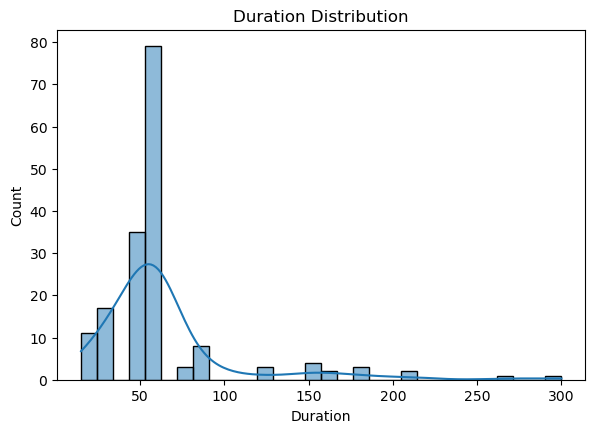

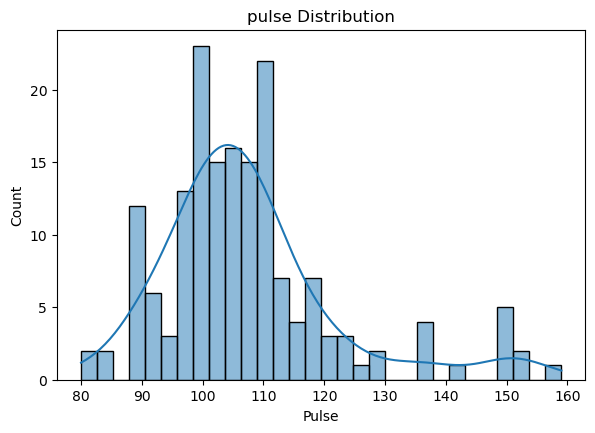

In [46]:
#set up the figure size
#histogram for duration 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['Duration'],bins=30,kde=True)
plt.title("Duration Distribution")

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['Pulse'],bins=30,kde=True)
plt.title("pulse Distribution")

Text(0.5, 1.0, 'Calories Distribution')

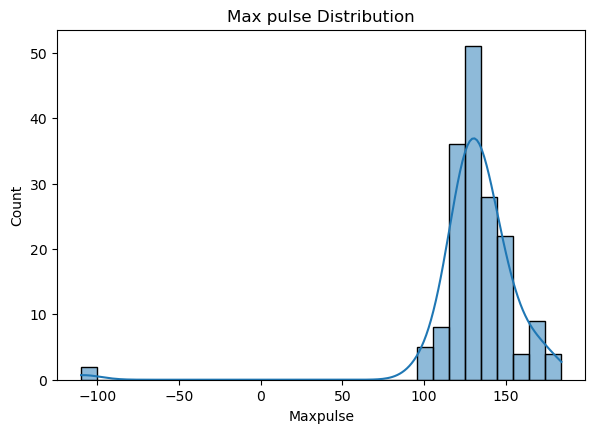

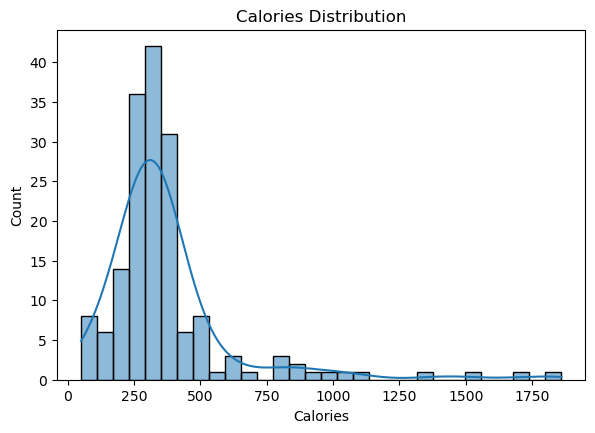

In [50]:
#Exercise plot for Max pulse and calories
#set up the figure size
#histogram for maxpulse 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['Maxpulse'],bins=30,kde=True)
plt.title("Max pulse Distribution")

#histogram for calories 
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(df['Calories'],bins=30,kde=True)
plt.title("Calories Distribution")

Text(0.5, 1.0, 'Pulse Vs Calories')

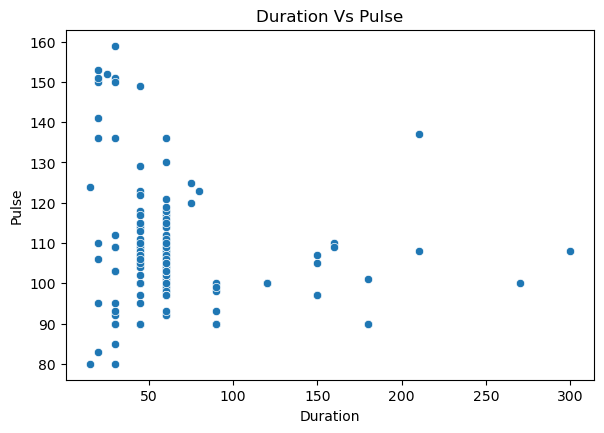

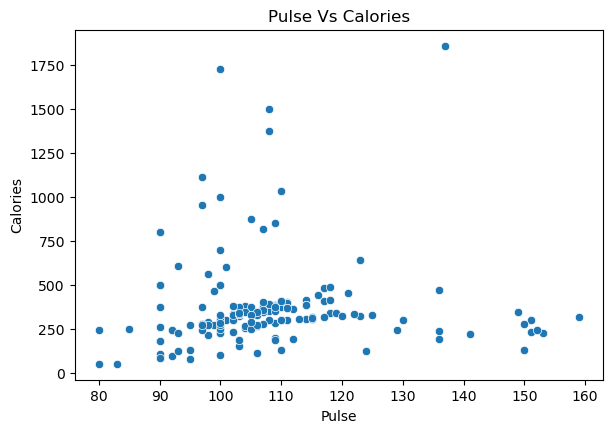

In [51]:

#scatter plot for Duration and pulse
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(x="Duration",y="Pulse",data=df)
plt.title("Duration Vs Pulse")
#pulse
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.scatterplot(x="Pulse",y="Calories",data=df)
plt.title("Pulse Vs Calories")

Text(0.5, 1.0, 'Max pulse Vs Pulse')

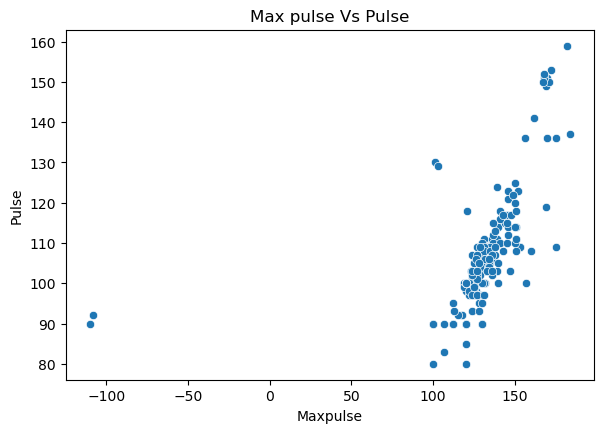

In [52]:
#max pulse vs pulse
plt.figure(figsize=(15,10))
plt.subplot(2,2,2)
sns.scatterplot(x="Maxpulse",y="Pulse",data=df)
plt.title("Max pulse Vs Pulse")

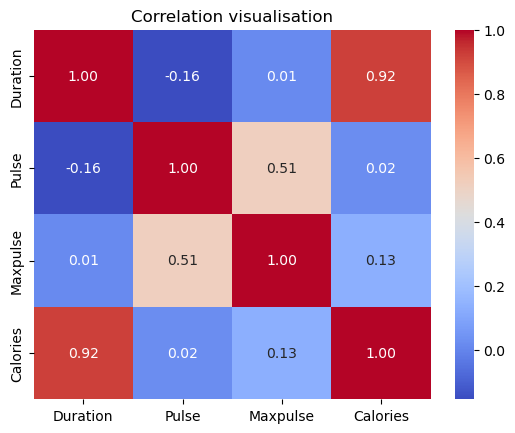

In [53]:
#correlation heatmap
corr=df.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation visualisation')
plt.show()